<a href="https://colab.research.google.com/github/KarolB29/Python-Data-Analysis/blob/main/LinReg_Model_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ceny nieruchomości w King County**

*   id – identyfikator nieruchomości
*   date – data wystawienia nieruchomości na sprzedaż
*   *price – cena nieruchomości (nasza zmienna objaśniana)*
*   bedrooms – liczba sypialni
*   bathrooms – liczba łazienek
*   sqft_living – powierzchnia użytkowa domu w stopach kwadratowych
*   sqft_lot – powierzchnia działki w stopach kwadratowych
*   floors – liczba pięter
*   waterfront – informacja czy dom jest przy nabrzeżu
*   condition – stan nieruchomości wyrażony w skali od 1 do 5
*   grade – jakość konstrukcji (im większa wartość, tym lepsza jakość, a także *   większy koszt jednostkowy wybudowania nieruchomości)
*   sqft_above – powierzchnia domu powyżej poziomu gruntu
*   sqft_basement – powierzchnia domu poniżej poziomu gruntu
*   yr_built – rok budowy
*   yr_renovated – rok remontu (jeżeli nieruchomość nie była odnawiana, wtedy *   zmienna przyjmuje wartość 0)
*   zipcode – kod pocztowy nieruchomości
*   lat – szerokość geograficzna, na której położona jest nieruchomość
*   long – długość geograficzna, na której położona jest nieruchomość
*   sqft_living15 – średnia powierzchnia użytkowa domu dla 15 najbliżej *   położonych nieruchomości
*   sqft_lot15 - średnia powierzchnia działki dla 15 najbliżej położonych nieruchomości


**W zmiennej *price* przechowywana jest cena nieruchomości wyrażona w dolarach amerykańskich (USD)**

In [14]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as ex
import seaborn as sns

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
housing_df = pd.read_csv('/content/drive/MyDrive/coderslab/MachineLearning/MAL_zjazd 1/DzieS 1/kc_house_data.csv', encoding='utf-8')
housing_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
housing_df.drop(columns=['id', 'date', 'lat', 'long', 'zipcode', 'yr_renovated', 'yr_built'], inplace=True)

In [11]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [12]:
housing_df.drop_duplicates(inplace=True)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21606 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21606 non-null  float64
 1   bedrooms       21606 non-null  int64  
 2   bathrooms      21606 non-null  float64
 3   sqft_living    21606 non-null  int64  
 4   sqft_lot       21606 non-null  int64  
 5   floors         21606 non-null  float64
 6   waterfront     21606 non-null  int64  
 7   view           21606 non-null  int64  
 8   condition      21606 non-null  int64  
 9   grade          21606 non-null  int64  
 10  sqft_above     21606 non-null  int64  
 11  sqft_basement  21606 non-null  int64  
 12  sqft_living15  21606 non-null  int64  
 13  sqft_lot15     21606 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.5 MB


In [13]:
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.160600e+04,21606.000000,21606.000000,21606.000000,2.160600e+04,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000
mean,5.401023e+05,3.370869,2.114679,2079.947839,1.511082e+04,1.494076,0.007544,0.234240,3.409516,7.656623,1788.394335,291.553504,1986.577756,12771.097936
std,3.671789e+05,0.930076,0.770246,918.547546,4.142664e+04,0.539881,0.086531,0.766201,0.650800,1.175533,828.175310,442.628193,685.448915,27308.076286
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.750000,1427.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069350e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


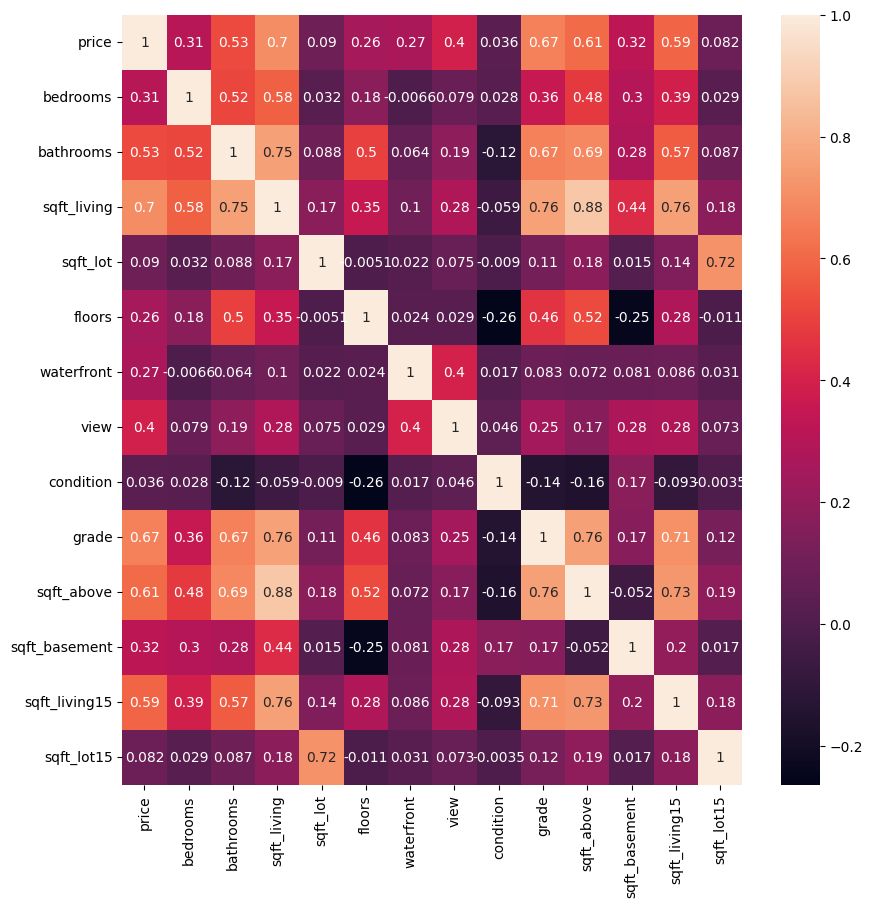

In [17]:
corr_matrix = housing_df.corr(method="pearson")

plt.figure(figsize=(10, 10))
corr_plot = sns.heatmap(corr_matrix, annot=True)

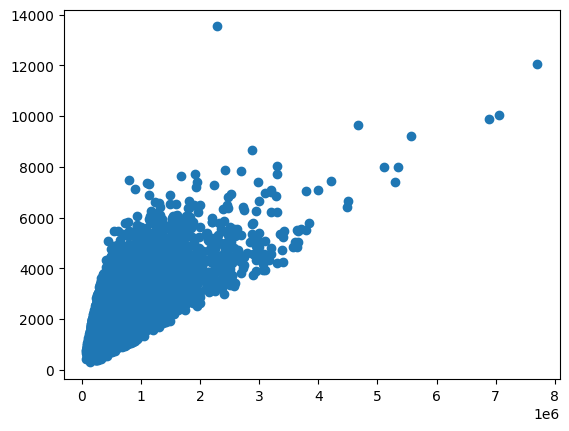

In [18]:
plt.scatter(housing_df['price'], housing_df['sqft_living'])

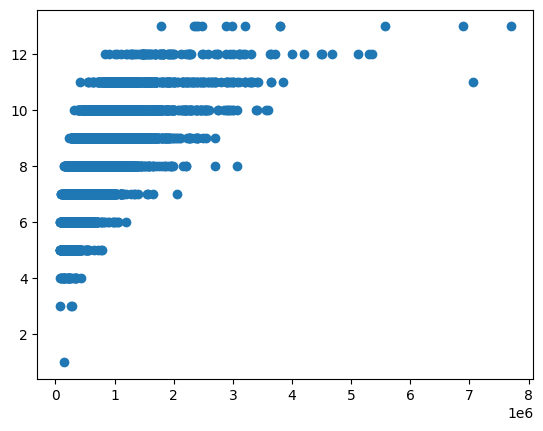

In [19]:
plt.scatter(housing_df['price'], housing_df['grade'])